# Introduction

In this Colab notebook, we show an example of the evaluation framework for cardinality estimators. 

For the full functionality of the notebook, for example the interactive forms that allow users to specify the parameters, users are suggested to use the [Google Colab](https://colab.sandbox.google.com/notebooks/intro.ipynb) to open this notebook. Please check this [introduction notebook](https://colab.sandbox.google.com/notebooks/welcome.ipynb) to begin with.

In [0]:
#@title Import the modules

from wfa_cardinality_estimation_evaluation_framework.estimators import vector_of_counts
from wfa_cardinality_estimation_evaluation_framework.simulations import set_generator
from wfa_cardinality_estimation_evaluation_framework.simulations import simulator
from wfa_cardinality_estimation_evaluation_framework.common import plotting

# Independent sets

In [0]:
#@title Customize your parameters
num_runs = 100  #@param {type:"integer"}
universe_size = 1000000  #@param {type:"integer"}
num_sets = 20  #@param {type:"integer"}
set_size = 20000  #@param {type:"integer"}
num_buckets = 4096  #@param {type:"integer"}
epsilon = np.log(3)  #@param

In [0]:
#@title Run simulations
sim = simulator.Simulator(
    num_runs=num_runs,
    set_generator_factory=set_generator.IndependentSetGenerator.get_generator_factory(
        universe_size=universe_size,
        num_sets=num_sets,
        set_size=set_size),
    estimator_config=simulator.EstimatorConfig(
        sketch_factory=vector_of_counts.VectorOfCounts.get_sketch_factory(
            num_buckets=num_buckets),
        estimator=vector_of_counts.SequentialEstimator(),
        sketch_noiser=vector_of_counts.LaplaceNoiser(
            epsilon=epsilon),
        estimate_noiser=None),
    sketch_random_state=np.random.RandomState(111),
    set_random_state=np.random.RandomState(999)
)
result = sim()

Text(0.5, 1.0, 'Independent case\nvector of counts with 4096 buckets.\nDP noise: log(3).')

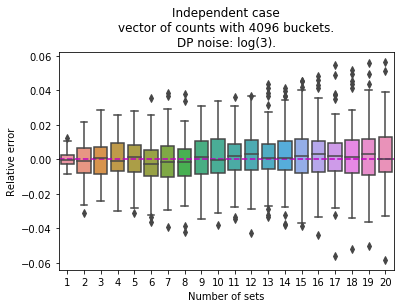

In [0]:
#@title Results

ax = plotting.boxplot_relative_error(result[0], 'num_sets', 'relative_error')
ax.set_title(
    'Independent case\n'
    'vector of counts with 4096 buckets.\n'
    'DP noise: log(3).')

# Fully-overlapped sets

In [0]:
#@title Customize your parameters
num_runs = 100  #@param {type:"integer"}
universe_size = 1000000  #@param {type:"integer"}
num_sets = 20  #@param {type:"integer"}
set_size = 20000  #@param {type:"integer"}
num_buckets = 4096  #@param {type:"integer"}
epsilon = np.log(3)  #@param

In [0]:
#@title Run simulations
sim = simulator.Simulator(
    num_runs=num_runs,
    set_generator_factory=set_generator.FullyOverlapSetGenerator.get_generator_factory(
        universe_size=universe_size,
        num_sets=num_sets,
        set_size=set_size),
    estimator_config=simulator.EstimatorConfig(
        sketch_factory=vector_of_counts.VectorOfCounts.get_sketch_factory(
            num_buckets=num_buckets),
        estimator=vector_of_counts.SequentialEstimator(),
        sketch_noiser=vector_of_counts.LaplaceNoiser(
            epsilon=epsilon)
        estimate_noiser=None),
    sketch_random_state=np.random.RandomState(222),
    set_random_state=np.random.RandomState(888)
)
result = sim()

Text(0.5, 1.0, 'Fully overlapped sets\nvector of counts with 4096 buckets.\nDP noise: log(3).')

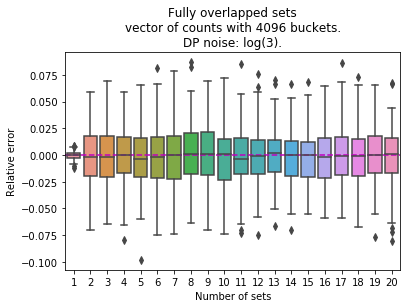

In [0]:
#@title Results

ax = plotting.boxplot_relative_error(result[0], 'num_sets', 'relative_error')
ax.set_title(
    'Fully overlapped sets\n'
    'vector of counts with 4096 buckets.\n'
    'DP noise: log(3).')

# Sequentially correlated with all previous sets

In [0]:
#@title Customize your parameters
num_runs = 100  #@param {type:"integer"}
universe_size = 1000000  #@param {type:"integer"}
num_sets = 20  #@param {type:"integer"}
set_size = 20000  #@param {type:"integer"}
num_buckets = 4096  #@param {type:"integer"}
epsilon = np.log(3)  #@param
order = 'reversed'  #@param {type:"string"}
shared_prop = 0.25  #@param {type:"number"}
correlated_sets = 'all'  #@param {type:"string"}

In [0]:
#@title Run simulations
sim = simulator.Simulator(
    num_runs=num_runs,
    set_generator_factory=set_generator.SequentiallyCorrelatedSetGenerator.get_generator_factory(
        universe_size=universe_size,
        num_sets=num_sets,
        set_size=set_size,
        order=order,
        shared_prop=shared_prop,
        correlated_sets=correlated_sets),
    estimator_config=simulator.EstimatorConfig(
        sketch_factory=vector_of_counts.VectorOfCounts.get_sketch_factory(
            num_buckets=num_buckets),
        estimator=vector_of_counts.SequentialEstimator(),
        noiser=vector_of_counts.LaplaceNoiser(
            epsilon=epsilon)),
    sketch_random_state=np.random.RandomState(333),
    set_random_state=np.random.RandomState(777)
)
result = sim()

Text(0.5, 1.0, 'Sequentially correlated with all previous sets in reversed order\nvector of counts with 4096 buckets.\nDP noise: log(3).')

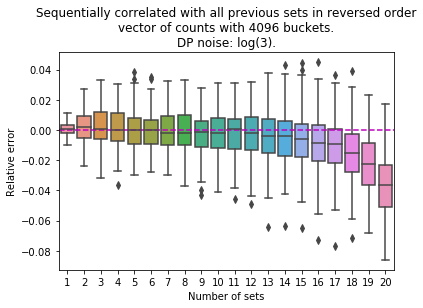

In [0]:
#@title Results

ax = plotting.boxplot_relative_error(result[0], 'num_sets', 'relative_error')
ax.set_title(
    'Sequentially correlated with all previous sets in reversed order\n'
    'vector of counts with 4096 buckets.\n'
    'DP noise: log(3).')

# Sequentially correlated with the previous set

In [0]:
#@title Customize your parameters
num_runs = 100  #@param {type:"integer"}
universe_size = 1000000  #@param {type:"integer"}
num_sets = 20  #@param {type:"integer"}
set_size = 20000  #@param {type:"integer"}
num_buckets = 4096  #@param {type:"integer"}
epsilon = np.log(3)  #@param
order = 'reversed'  #@param {type:"string"}
shared_prop = 0.25  #@param {type:"number"}
correlated_sets = 'one'  #@param {type:"string"}

In [0]:
#@title Run simulations
sim = simulator.Simulator(
    num_runs=num_runs,
    set_generator_factory=set_generator.SequentiallyCorrelatedSetGenerator.get_generator_factory(
        universe_size=universe_size,
        num_sets=num_sets,
        set_size=set_size,
        order=order,
        shared_prop=shared_prop,
        correlated_sets=correlated_sets),
    estimator_config=simulator.EstimatorConfig(
        sketch_factory=vector_of_counts.VectorOfCounts.get_sketch_factory(
            num_buckets=num_buckets),
        estimator=vector_of_counts.SequentialEstimator(),
        noiser=vector_of_counts.LaplaceNoiser(
            epsilon=epsilon)),
    sketch_random_state=np.random.RandomState(333),
    set_random_state=np.random.RandomState(777)
)
result = sim()

Text(0.5, 1.0, 'Sequentially correlated with the previous set in reversed order\nvector of counts with 4096 buckets.\nDP noise: log(3).')

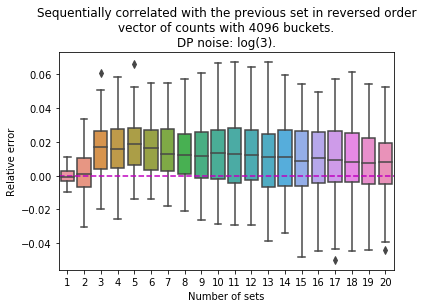

In [0]:
#@title Results

ax = plotting.boxplot_relative_error(result[0], 'num_sets', 'relative_error')
ax.set_title(
    'Sequentially correlated with the previous set in reversed order\n'
    'vector of counts with 4096 buckets.\n'
    'DP noise: log(3).')